## Analizando multimillonarios con Python

### Cargar dataset

In [86]:
# Importar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('forbes_2022_billionaires.csv') # Datos tomados de Kaggle
data.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


### Pre-procesamiento de datos

In [ ]:
# Comandos para la comprensión de datos
# data.shape
# data.dtypes
# data.describe()

<strong>Resultado:</strrong><br>
+ 2668 filas y 22 columnas
+ datos numéricos y categóricos

In [87]:
# Seleccionar las siguientes columnas
data = data.loc[:, ['rank', 'personName', 'age', 'finalWorth', 'country', 'source', 'category']]
data.head()

,rank,personName,age,finalWorth,country,source,category
0,1,Elon Musk,50.0,219000.0,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,58.0,171000.0,United States,Amazon,Technology
2,3,Bernard Arnault & family,73.0,158000.0,France,LVMH,Fashion & Retail
3,4,Bill Gates,66.0,129000.0,United States,Microsoft,Technology
4,5,Warren Buffett,91.0,118000.0,United States,Berkshire Hathaway,Finance & Investments


In [88]:
# Convertir la columna 'rank' en una columna de índice
data = data.set_index('rank')
data.head()

,personName,age,finalWorth,country,source,category
rank,,,,,,
1,Elon Musk,50.0,219000.0,United States,"Tesla, SpaceX",Automotive
2,Jeff Bezos,58.0,171000.0,United States,Amazon,Technology
3,Bernard Arnault & family,73.0,158000.0,France,LVMH,Fashion & Retail
4,Bill Gates,66.0,129000.0,United States,Microsoft,Technology
5,Warren Buffett,91.0,118000.0,United States,Berkshire Hathaway,Finance & Investments


In [89]:
# Buscar valores faltantes
data.isnull().sum()

personName     0
age           86
finalWorth     0
country       13
source         0
category       0
dtype: int64

Se muestran datos faltantes en las categorías de edad, país y género.<br>
Ya que no son muchos los datos faltantes en estas columnas, voy a eliminarlos.

In [90]:
# Eliminar faltantes
data.dropna(inplace=True) # El parámetro 'inplace' en True establece que va a borrar los datos del dataframe original

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2574 entries, 1 to 2578
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   personName  2574 non-null   object 
 1   age         2574 non-null   float64
 2   finalWorth  2574 non-null   float64
 3   country     2574 non-null   object 
 4   source      2574 non-null   object 
 5   category    2574 non-null   object 
dtypes: float64(2), object(4)
memory usage: 140.8+ KB


### Top multimillonarios

In [92]:
# Establecer paletas de colores para los gráficos
paleta_barras = ['#FF7B00', '#FF8800', '#FF9500', '#FFA200', '#FFAA00', '#FFB700', '#FFC300', '#FFD000', '#FFDD00', '#FFEA00']
paleta_barras2 = ['#03071E', '#370617', '#6A040F', '#9D0208', '#D00000', '#DC2F02', '#E85D04', '#F48C06', '#FAA307', '#FFBA08']
paleta_circular = ['#264653', '#2A9D8F', '#E9C46A', '#F4A261', '#E76F51']

/tmp/ipykernel_472/1909309704.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = data['personName'][:10],
/tmp/ipykernel_472/1909309704.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  x = data['finalWorth'][:10],


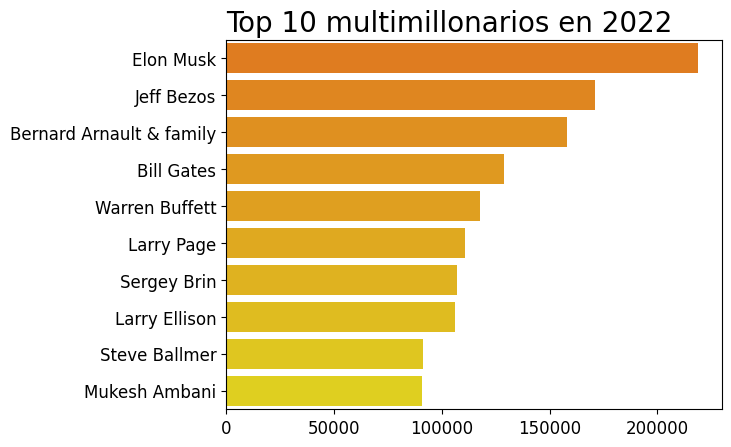

In [93]:
# Gráfico de barras Top 10
sns.barplot(
    y = data['personName'][:10],
    x = data['finalWorth'][:10],
    palette = paleta_barras)
plt.title('Top 10 multimillonarios en 2022', fontsize='20', loc='left')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Top industrías con la mayor cantidad de multimillonarios

In [94]:
# Primero, calcular cuántas industrias únicas hay en el dataset
data['category'].unique()

array(['Automotive', 'Technology', 'Fashion & Retail',
       'Finance & Investments', 'Diversified', 'Media & Entertainment',
       'Telecom', 'Food & Beverage', 'Logistics', 'Real Estate',
       'Metals & Mining', 'Manufacturing', 'Gambling & Casinos',
       'Healthcare', 'Service', 'Energy', 'Construction & Engineering',
       'Sports'], dtype=object)

In [95]:
# Quitar espacios y reemplazar & con _
data['category'] = data['category'].apply(lambda x:x.replace(' ','')).apply(lambda x:x.replace('&','_'))

In [96]:
# Ver de nuevo las categorías
data['category'].unique()

array(['Automotive', 'Technology', 'Fashion_Retail',
       'Finance_Investments', 'Diversified', 'Media_Entertainment',
       'Telecom', 'Food_Beverage', 'Logistics', 'RealEstate',
       'Metals_Mining', 'Manufacturing', 'Gambling_Casinos', 'Healthcare',
       'Service', 'Energy', 'Construction_Engineering', 'Sports'],
      dtype=object)

In [97]:
# Encontrar el número de categorías
data_category = data.groupby('category').size()
data_category.head()

category
Automotive                   66
Construction_Engineering     45
Diversified                 175
Energy                       93
Fashion_Retail              239
dtype: int64

In [98]:
# Convertir a DataFrame
data_category = data_category.to_frame()
data_category.head()

,0
category,
Automotive,66
Construction_Engineering,45
Diversified,175
Energy,93
Fashion_Retail,239


In [99]:
# Nombrar la primera columna y ordenar los valores por el número de categorías
data_category = data_category.rename(columns={0:'Count'}).sort_values(by='Count', ascending=False)
data_category.head()

,Count
category,
Finance_Investments,382
Technology,333
Manufacturing,319
Fashion_Retail,239
Healthcare,209


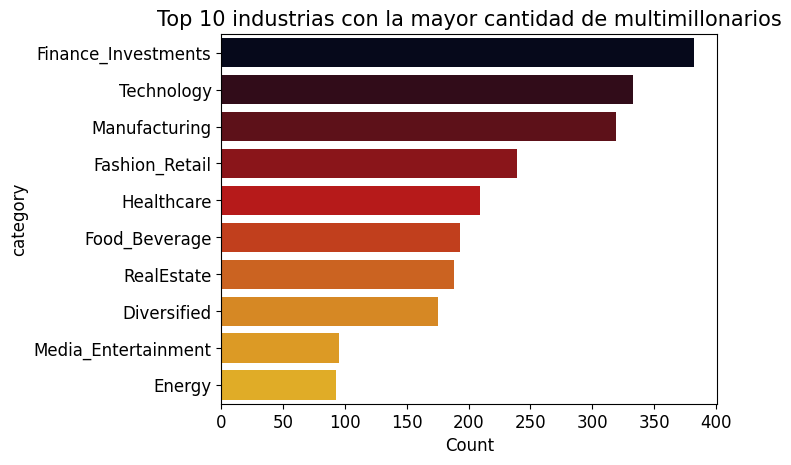

In [100]:
# Gráfico de barras Top 10
sns.barplot(
    x = data_category["Count"][:10],
    y = data_category.index[:10],
    palette = paleta_barras2)
plt.title('Top 10 industrias con la mayor cantidad de multimillonarios', fontsize=15)
plt.show()

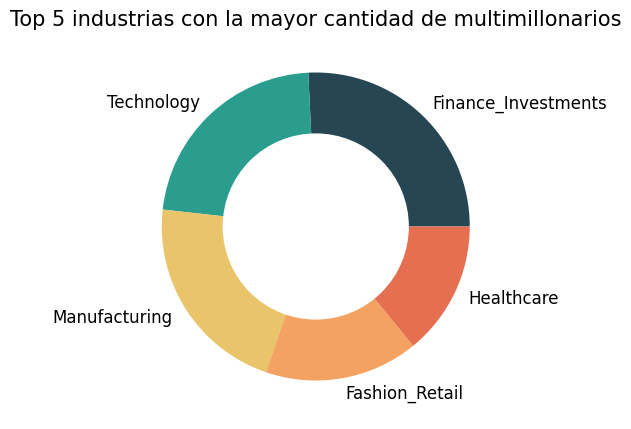

In [101]:
# Gráfico circular Top 5
a = data['category'].value_counts().head()
index = a.index
categories = a.values
plt.figure(figsize=(5,5))
plt.pie(
    categories,
    labels = index,
    colors = paleta_circular)
central_circle = plt.Circle((0, 0), 0.6, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title('Top 5 industrias con la mayor cantidad de multimillonarios', fontsize=15)
plt.show()

### Top países con la mayor cantidad de multimillonarios

In [102]:
# Primero, calcular cuántos países únicos hay en el dataset
len(data['country'].unique())

73

In [103]:
# Agrupar el dataset según la columna de país con el método groupby
data_country = data.groupby('country')

# Calcular la cantidad de multimillonarios por país con el método size(), y luego clasificar los países con la mayor cantidad de multimillonarios con sort_values(). Transformar esos datos en un DataFrame.
data_country_count = pd.DataFrame(
    data_country.size().sort_values(ascending=False), columns=['Count'])
data_country_count.head()

,Count
country,
United States,742
China,547
India,155
Germany,94
United Kingdom,82


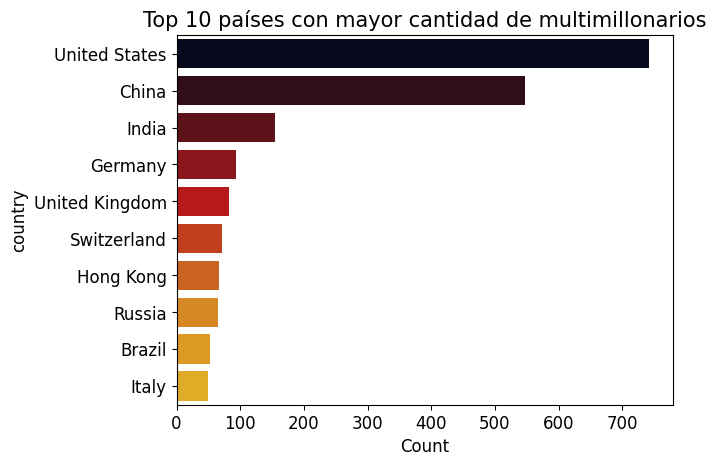

In [104]:
# Gráfico de barras Top 10
sns.barplot(
    x = data_country_count["Count"][:10],
    y = data_country_count.index[:10],
    palette = paleta_barras2)
plt.title('Top 10 países con mayor cantidad de multimillonarios', fontsize=15)
plt.show()

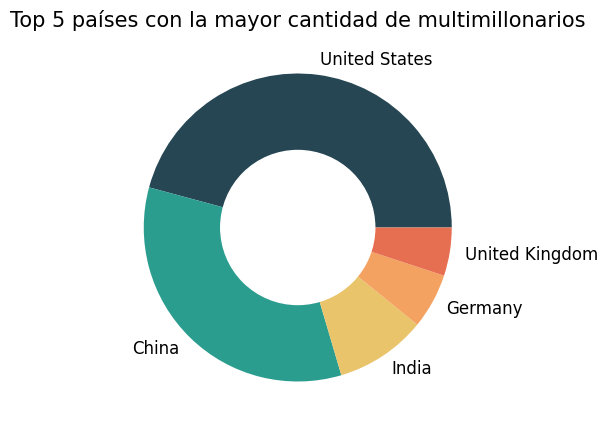

In [105]:
# Gráfico circular Top 5
a = data['country'].value_counts().head()
index = a.index
Countries = a.values
plt.figure(figsize=(5, 5))
plt.pie(
    Countries,
    labels = index,
    colors = paleta_circular)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title('Top 5 países con la mayor cantidad de multimillonarios', fontsize=15)
plt.show()

Estados Unidos y China son los países con el mayor número de multimillonarios. Esto indica que las condiciones del entorno empresarial y el éxito de las empresas emergentes son muy favorables en estos dos países, en comparación con el resto del mundo.

### La relación entre el dinero y la edad

Usar diagrama de dispersión para visualizar la relación entre el dinero y la edad

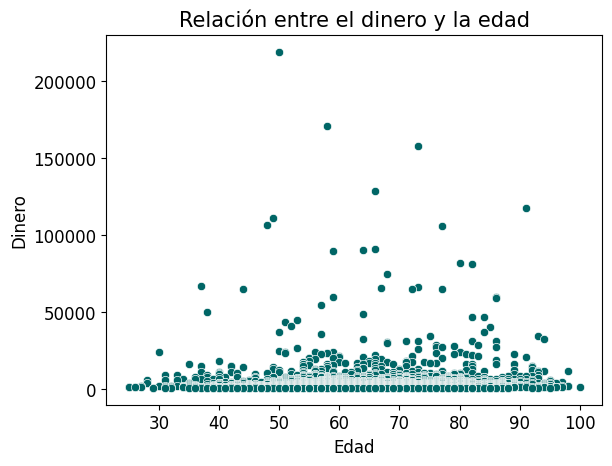

In [106]:
# Graficar
sns.scatterplot(
    x = data['age'],
    y = data['finalWorth'],
    color = '#006666')
plt.title('Relación entre el dinero y la edad', fontsize=15)
plt.xlabel('Edad')
plt.ylabel('Dinero')
plt.show()

<strong>Resultado:</strong> No existe relación entre el dinero y la edad.

### La distribución de la edad

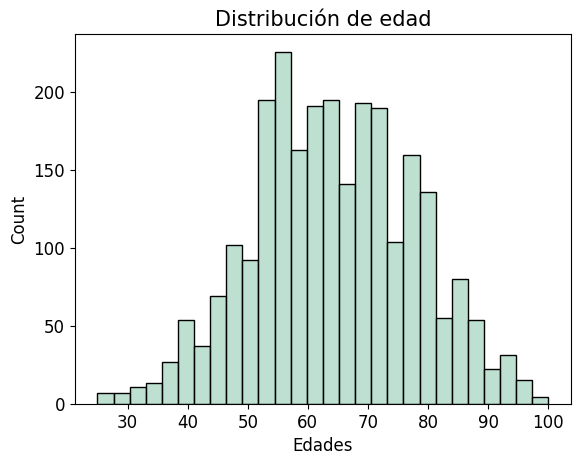

In [107]:
# Graficar
sns.histplot(data['age'], color='#a8d6c2')
plt.title('Distribución de edad', fontsize=15)
plt.xlabel('Edades')
plt.show()

<strong>Resultado:</strong> La edad de los multimillonarios está mayoritariamente entre los 50 y los 80 años.

### Conclusiones

Los multimillonarios registrados por Forbes, que representan una gran concentración de la riqueza mundial, se concentran en los países más ricos y sobretodo en sectores como la tecnología y las finanzas. Además, no hay una correlación entre el dinero y la edad, aunque la edad de los multimillonarios generalmente oscila entre los 50 y los 80 años.